In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import BoxStyle

In [7]:
rosette_df = pd.read_csv('../data/rosetteAreaWithAdditionalCategory.csv')

In [3]:
class ExtendedTextBox(BoxStyle._Base):
    """
    An Extended Text Box that expands to the axes limits 
                        if set in the middle of the axes
    """

    def __init__(self, pad=0.3, width=500.):
        """
        width: 
            width of the textbox. 
            Use `ax.get_window_extent().width` 
                   to get the width of the axes.
        pad: 
            amount of padding (in vertical direction only)
        """
        self.width=(width*0.9)
        self.pad = pad
        super(ExtendedTextBox, self).__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        x0 and y0 are the lower left corner of original text box
        They are set automatically by matplotlib
        """
        # padding
        pad = mutation_size * self.pad

        # we add the padding only to the box height
        height = height + 2.*pad
        # boundary of the padded box
        y0 = y0 - pad
        y1 = y0 + height
        _x0 = x0
        x0 = _x0 +width /2. - self.width/2.
        x1 = _x0 +width /2. + self.width/2.

        cp = [(x0, y0),
              (x1, y0), (x1, y1), (x0, y1),
              (x0, y0)]

        com = [Path.MOVETO,
               Path.LINETO, Path.LINETO, Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path
    

# register the custom style
BoxStyle._style_list["ext"] = ExtendedTextBox

/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


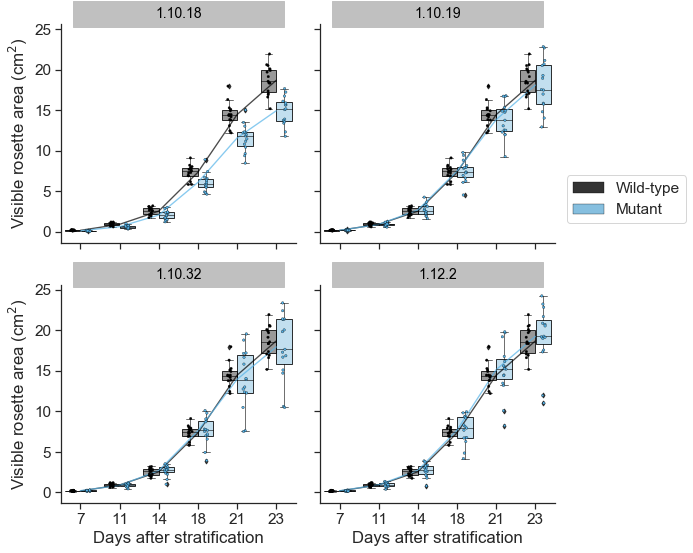

In [18]:
# sns.plotting_context()
sns.set(font_scale = 1.4, font="Arial")
sns.set_style(style='ticks')


# Choose hue colour palette
colours = ['#000000', '#56B4E9']

# Set up FacetGrid for dataframe
grid = sns.FacetGrid(rosette_df, col="Line", col_order=['1.10.18', '1.10.19', '1.10.32', '1.12.2'], col_wrap=2, 
                    size=4, aspect=1)

# Draw a box plot
boxplot = grid.map(sns.boxplot, 'Days after stratification', 'Rosette area (cm2)', data=rosette_df, 
      hue='mutant_wt', hue_order=['wt', 'mutant'], palette=colours, fliersize=3.5, linewidth=0.8)

# Set boxplot transparency and draw a pointplot over each one
for i, ax in enumerate(grid.axes.flat):
    for patch in ax.artists:
        red, green, blue, alpha = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, .4))
    
    if i == 0:
        Line = '1.10.18'
    if i == 1:
        Line = '1.10.19'
    if i == 2: 
        Line = '1.10.32'
    if i == 3:
        Line = '1.12.2'
    sns.pointplot(x=rosette_df['Days after stratification']-7, y='Rosette area (cm2)', data=rosette_df[rosette_df['Line'] == Line],
                 hue='mutant_wt', hue_order = ['wt', 'mutant'], ax=ax, palette=colours, estimator=np.mean, 
                 markers="", dodge=False, join=True, scale=0.5, errwidth=0)
    plt.setp(ax.lines, alpha=.7)

# Draw a strip plot
stripplot = grid.map(sns.stripplot, 'Days after stratification', 'Rosette area (cm2)', data=rosette_df, 
      hue='mutant_wt', hue_order=['wt', 'mutant'], size=2.5, alpha=1, jitter=True, linewidth=0.3, 
      dodge=True, palette=colours, edgecolor='gray')

# Adjust position and transparency of legend 
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles[0:2],['Wild-type', 'Mutant'], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
for lh in leg.legendHandles: 
    lh.set_alpha(.8)
    
# Set titles 
grid.set_titles("{col_name}")
for ax in grid.axes:
    # set the title position to the horizontal center (0.5) of the axes
    title = ax.set_title(ax.get_title(), position=(.5, 1.0), backgroundcolor="silver", color='black', 
                         size=14)
    # set the box style of the title text box to our custom box
    bb = title.get_bbox_patch()
    # use the axes' width as width of the text box
    bb.set_boxstyle("ext", pad=0.4, width=ax.get_window_extent().width )
    

# Set axis labels
grid.set_axis_labels(x_var="Days after stratification", y_var="Visible rosette area (cm$^2$)")

plt.savefig("../figures/rosetteArea.pdf", transparent=True, dpi=300, bbox_inches='tight')

In [8]:
from scipy.stats import logistic

import matplotlib.pyplot as plt
import numpy as np

In [31]:
grouped_df = rosette_df.groupby(['Line', 'Plant', 'Days after stratification']).agg({'Rosette area (cm2)': ['mean', 'std']})
grouped_df.columns = ['area_mean', 'area_std']
grouped_df = grouped_df.reset_index()


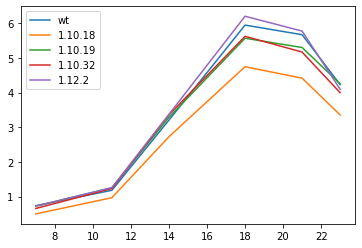

In [32]:
fig, ax = plt.subplots(1, 1)

for line in ['wt', '1.10.18', '1.10.19', '1.10.32', '1.12.2']:
    gradient = np.gradient(grouped_df[(grouped_df['Plant'] == line) & (grouped_df['Line'] == line)]['area_mean'])
    plt.plot(grouped_df[(grouped_df['Plant'] == line) & (grouped_df['Line'] == line)]['Days after stratification'],gradient, label=line)
    
ax.legend()